## 📊 Fiche Synthétique des Données

* **Source :** [Online Retail II (UCI Machine Learning Repository)](https://archive.ics.uci.edu/dataset/502/online-retail-ii)
* **Période couverte :** Du 01/12/2009 au 09/12/2011
* **Volume :** Environ 1,07 million de lignes (transactions)
* **Colonnes importantes :**
    * `Invoice`: Identifiant de la facture (essentiel pour regrouper les transactions).
    * `Quantity`: Quantité d'articles (essentiel pour le calcul du revenu).
    * `InvoiceDate`: Date de la transaction (base pour la Récence et les Cohortes).
    * `Price`: Prix unitaire (essentiel pour le calcul Monétaire).
    * `Customer ID`: Identifiant du client (base pour toute l'analyse RFM et CLV).

## Dictionnaire des Variables

Voici le détail des colonnes présentes dans le jeu de données :

| Nom de la Colonne | Type (Pandas) | Sémantique (Description) | Unités / Valeurs Exemples | |
| :--- | :--- | :--- | :--- | :--- |
| **Invoice** | `object` (string) | Identifiant unique de la facture. | `489434` |
| **StockCode** | `object` (string) | Identifiant unique du produit (SKU). | `85048` |
| **Description** | `object` (string) | Nom / description de l'article. | `PINK CHERRY LIGHTS` |
| **Quantity** | `int64` | Quantité d'articles pour cette ligne. | `12`, `48` |
| **InvoiceDate** | `datetime64[ns]` | Date et heure de la transaction. | `2009-12-01 07:45:00` |
| **Price** | `float64` | Prix unitaire de l'article. | `6.95`, `2.10` |
| **Customer ID** | `float64` | Identifiant unique du client. | `13085.0` |
| **Country** | `object` (string) | Pays de résidence du client. | `United Kingdom` |

## Qualité des données

#### Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Lecture du dataset

In [2]:
df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

df = pd.concat([df1, df2], ignore_index=True)

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
print(df.shape)
print(df.columns)


(1067371, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


#### Valeurs manquantes

In [6]:
# 1. Calcul du pourcentage de valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonnes': df.columns,
    'Nb manquants': missing_values,
    '% manquants': missing_percent
}).sort_values(by='% manquants', ascending=False)

print("\n--- Pourcentage de valeurs manquantes ---")
print(missing_df)


--- Pourcentage de valeurs manquantes ---
                Colonnes  Nb manquants  % manquants
Customer ID  Customer ID        243007    22.766873
Description  Description          4382     0.410541
StockCode      StockCode             0     0.000000
Invoice          Invoice             0     0.000000
Quantity        Quantity             0     0.000000
InvoiceDate  InvoiceDate             0     0.000000
Price              Price             0     0.000000
Country          Country             0     0.000000


C:\Users\etien\AppData\Local\Temp\ipykernel_19432\3450063475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Colonnes', y='% manquants', data=missing_df, palette='viridis')


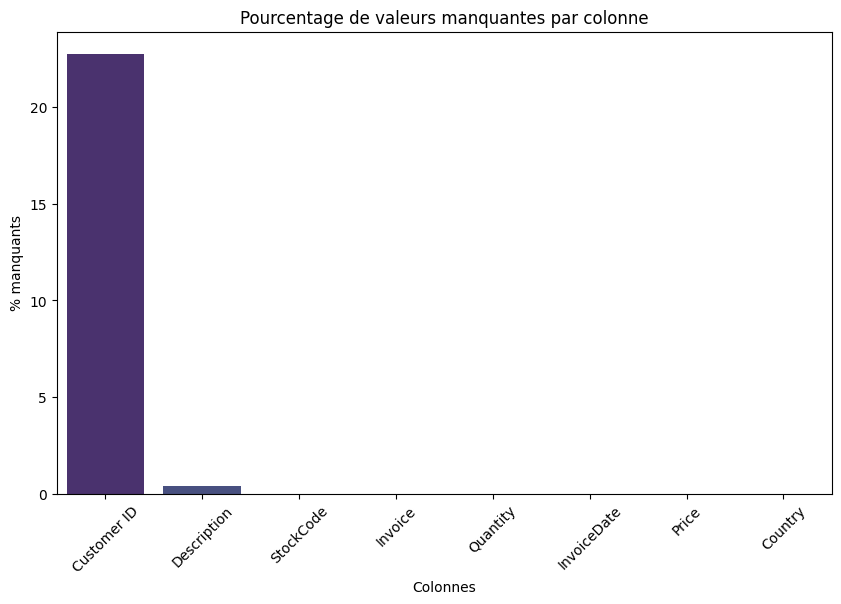

In [7]:
# 2. Visualisation des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Colonnes', y='% manquants', data=missing_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.ylabel('% manquants')
plt.xlabel('Colonnes')
plt.show()

#### 🔍 Analyse des valeurs manquantes

**Résumé des résultats**

*Customer ID :*

* Nombre de valeurs manquantes : 243 007
* Pourcentage : 22,77 %
* Impact : Critique pour les analyses RFM et CLV (impossible d’identifier le client).
* **Recommandation :** Exclure ces lignes pour les analyses centrées sur le client, mais les conserver pour l’analyse globale des ventes.

*Description :*

* Nombre de valeurs manquantes : 4 382
* Pourcentage : 0,41 %
* Impact : Faible, n’affecte pas les métriques financières mais peut limiter l’analyse produit.
* **Recommandation :** Conserver les lignes (si StockCode est présent), ou imputer par “Unknown”.

*Autres colonnes :*

Aucun NaN détecté.

**Visualisation**

Le bar chart montre une concentration des valeurs manquantes sur Customer ID, représentant près d’un quart du dataset, tandis que les autres colonnes sont quasi complètes.

**Implications pour le projet**

Les analyses RFM, cohortes et CLV doivent être basées uniquement sur les transactions avec Customer ID non nul.
Prévoir un filtre “inclure/exclure clients anonymes” dans l’application Streamlit.